# Proper big notebook

In [226]:
#import packages, there might be some extras
import time
import os
import platform

import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc, accuracy_score, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
import imageio
from tqdm import tqdm

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.grid'] = True
plt.rcParams['legend.fontsize'] = 'large'



Set the correct working directory

In [3]:
if platform.system() == "Darwin":
    root_directory = '/Users/lorenzobarbiero/Documents/GitHub/CNN-Gait-recognition'
else:
    root_directory = None ##Francesco qui metti il tuo path
    
print('root directory is ' + root_directory)

root directory is /Users/lorenzobarbiero/Documents/GitHub/CNN-Gait-recognition


## Train/Test Split

Load reference file, separate the two different data types and one hot encode the labels

In [210]:
# Create a dataframe containing all the files and the labels from the reference file
reference_df = pd.read_csv(root_directory+'/reference_document.csv')
reference_df


,File Name,Path from Root,Type,Label
0,Sbj2_steppage_T9_P.csv,subject2/steppage/trial9/,pressure,steppage
1,Sbj2_steppage_T9_S.csv,subject2/steppage/trial9/,skeleton,steppage
2,Sbj2_steppage_T14_P.csv,subject2/steppage/trial14/,pressure,steppage
3,Sbj2_steppage_T14_S.csv,subject2/steppage/trial14/,skeleton,steppage
4,Sbj2_steppage_T13_S.csv,subject2/steppage/trial13/,skeleton,steppage
...,...,...,...,...
2875,Sbj9_trendelenburg_T11_S.csv,subject9/trendelenburg/trial11/,skeleton,trendelenburg
2876,Sbj9_trendelenburg_T18_S.csv,subject9/trendelenburg/trial18/,skeleton,trendelenburg
2877,Sbj9_trendelenburg_T18_P.csv,subject9/trendelenburg/trial18/,pressure,trendelenburg
2878,Sbj9_trendelenburg_T20_S.csv,subject9/trendelenburg/trial20/,skeleton,trendelenburg


In [211]:
# Create a dataframe containing all the files and the labels from the reference file
reference_df = pd.read_csv(root_directory+'/reference_document.csv')

#split the dataframe into skeleton and pressure, drop the type column
reference_df_s = reference_df[reference_df['Type']=='skeleton'].drop(columns='Type')
reference_df_p = reference_df[reference_df['Type']=='pressure'].drop(columns='Type')

#train_test split
train_s, val_s = train_test_split(reference_df_s, test_size=0.2, stratify=reference_df_s['Label'], random_state=123)
train_p, val_p = train_test_split(reference_df_p, test_size=0.2, stratify=reference_df_p['Label'], random_state=123)

#frequence counts
print("Train Skelly")
print(train_s['Label'].value_counts())
print('\n',"Validation Skelly")
print(val_s['Label'].value_counts())
print('\n',"Train Pressure")
print(train_p['Label'].value_counts())
print('\n',"Validation Pressure")
print(val_p['Label'].value_counts())

Train Skelly
trendelenburg    192
steppage         192
stifflegged      192
antalgic         192
lurching         192
normal           192
Name: Label, dtype: int64

 Validation Skelly
steppage         48
normal           48
lurching         48
stifflegged      48
trendelenburg    48
antalgic         48
Name: Label, dtype: int64

 Train Pressure
trendelenburg    192
steppage         192
stifflegged      192
antalgic         192
lurching         192
normal           192
Name: Label, dtype: int64

 Validation Pressure
steppage         48
normal           48
lurching         48
stifflegged      48
trendelenburg    48
antalgic         48
Name: Label, dtype: int64


In [212]:
train_s

,File Name,Path from Root,Label
2135,Sbj1_trendelenburg_T1_S.csv,subject1/trendelenburg/trial1/,trendelenburg
1881,Sbj11_trendelenburg_T9_S.csv,subject11/trendelenburg/trial9/,trendelenburg
20,Sbj2_steppage_T10_S.csv,subject2/steppage/trial10/,steppage
2516,Sbj10_stiff-legged_T18_S.csv,subject10/stiff-legged/trial18/,stifflegged
2483,Sbj10_stiff-legged_T14_S.csv,subject10/stiff-legged/trial14/,stifflegged
...,...,...,...
697,Sbj12_trendelenburg_T8_S.csv,subject12/trendelenburg/trial8/,trendelenburg
1509,Sbj6_antalgic_T16_S.csv,subject6/antalgic/trial16/,antalgic
1042,Sbj3_stiff-legged_T14_S.csv,subject3/stiff-legged/trial14/,stifflegged
1366,Sbj8_normal_T7_S.csv,subject8/normal/trial7/,normal


In [214]:
list(train_s['Label'])

['trendelenburg',
 'trendelenburg',
 'steppage',
 'stifflegged',
 'stifflegged',
 'antalgic',
 'stifflegged',
 'steppage',
 'steppage',
 'trendelenburg',
 'stifflegged',
 'lurching',
 'steppage',
 'normal',
 'antalgic',
 'normal',
 'antalgic',
 'lurching',
 'lurching',
 'lurching',
 'trendelenburg',
 'normal',
 'steppage',
 'antalgic',
 'normal',
 'stifflegged',
 'steppage',
 'steppage',
 'steppage',
 'stifflegged',
 'steppage',
 'stifflegged',
 'normal',
 'steppage',
 'antalgic',
 'trendelenburg',
 'steppage',
 'lurching',
 'lurching',
 'steppage',
 'steppage',
 'trendelenburg',
 'trendelenburg',
 'lurching',
 'steppage',
 'antalgic',
 'trendelenburg',
 'normal',
 'steppage',
 'steppage',
 'steppage',
 'trendelenburg',
 'lurching',
 'normal',
 'lurching',
 'lurching',
 'lurching',
 'stifflegged',
 'steppage',
 'trendelenburg',
 'normal',
 'antalgic',
 'antalgic',
 'normal',
 'steppage',
 'lurching',
 'normal',
 'lurching',
 'antalgic',
 'normal',
 'normal',
 'normal',
 'steppage',
 't

In [219]:
file_names = [fpath(train_s,i) for i in range(0,len(train_s))]
type(file_names)

list

1 hot encode labels

In [173]:
'''train_s_labs = pd.get_dummies(data = train_s, columns=['Label'])
train_s['OHE Label'] = train_s_labs.apply(lambda row: np.array(row[2:]), axis=1)
train_s.drop(columns=['Label'], inplace=True)

val_s_labs = pd.get_dummies(data = val_s, columns=['Label'])
val_s['OHE Label'] = val_s_labs.apply(lambda row: np.array(row[2:]), axis=1)
val_s.drop(columns=['Label'], inplace=True)

train_p_labs = pd.get_dummies(data = train_p, columns=['Label'])
train_p['OHE Label'] = train_p_labs.apply(lambda row: np.array(row[2:]), axis=1)
train_p.drop(columns=['Label'], inplace=True)

val_p_labs = pd.get_dummies(data = val_p, columns=['Label'])
val_p['OHE Label'] = val_p_labs.apply(lambda row: np.array(row[2:]), axis=1)
val_p.drop(columns=['Label'], inplace=True)

train_s'''

,File Name,Path from Root,OHE Label
2135,Sbj1_trendelenburg_T1_S.csv,subject1/trendelenburg/trial1/,"[0, 0, 0, 0, 0, 1]"
1881,Sbj11_trendelenburg_T9_S.csv,subject11/trendelenburg/trial9/,"[0, 0, 0, 0, 0, 1]"
20,Sbj2_steppage_T10_S.csv,subject2/steppage/trial10/,"[0, 0, 0, 1, 0, 0]"
2516,Sbj10_stiff-legged_T18_S.csv,subject10/stiff-legged/trial18/,"[0, 0, 0, 0, 1, 0]"
2483,Sbj10_stiff-legged_T14_S.csv,subject10/stiff-legged/trial14/,"[0, 0, 0, 0, 1, 0]"
...,...,...,...
697,Sbj12_trendelenburg_T8_S.csv,subject12/trendelenburg/trial8/,"[0, 0, 0, 0, 0, 1]"
1509,Sbj6_antalgic_T16_S.csv,subject6/antalgic/trial16/,"[1, 0, 0, 0, 0, 0]"
1042,Sbj3_stiff-legged_T14_S.csv,subject3/stiff-legged/trial14/,"[0, 0, 0, 0, 1, 0]"
1366,Sbj8_normal_T7_S.csv,subject8/normal/trial7/,"[0, 0, 1, 0, 0, 0]"


In [206]:
'''def extractlabs(ref_df, index):
    npy_labels = np.array(ref_df.iloc[index][-1])
    print(type(npy_labels))
    return npy_labels

ext = extractlabs(train_s,4)
print(ext)'''

<class 'numpy.ndarray'>
[0 0 0 0 1 0]


## Preprocessing functions

### Common useful functions
Quality of life function for later use

In [228]:
def fpath(ref_df,index):
    file_name = ref_df.loc[ref_df.index[index],'File Name']   
    filepath = root_directory + '/dataset/' + ref_df.loc[ref_df['File Name']==file_name,'Path from Root'] + file_name
    
    return filepath.iloc[0]

In [229]:
print(fpath(reference_df,3))

/Users/lorenzobarbiero/Documents/GitHub/CNN-Gait-recognition/dataset/subject2/steppage/trial14/Sbj2_steppage_T14_S.csv


Normalization function will be the same between the two dataset

In [11]:
def normalize_data(data):
    # Amplitude estimate
    norm_factor = np.percentile(data, 99) - np.percentile(data, 5)
    return (data / norm_factor)

### Skeleton specific functions
Loading function for skeleton data

In [272]:
def load_data_sk(index, ref_df, debug = 0):
    #if isinstance(data_dir, bytes):
    #    data_dir = data_dir.decode()
    #if isinstance(file_name, bytes):
    #    file_name = file_name.decode()
    
    
    
    #file_name = ref_df.loc[ref_df.index[index],'File Name']    
    #filepath = root_directory + '/dataset/' + ref_df.loc[ref_df['File Name']==file_name,'Path from Root'] + file_name
    
    filepath = fpath(ref_df,index)
    # Read the CSV file into a pandas DataFrame, Drop time signature column and last empty column
    df_skelly = pd.read_csv(filepath, header=None)
    df_skelly = df_skelly.drop([df_skelly.columns[0],df_skelly.columns[-1]], axis=1)
        
    #convert to np array and reshape
    data = df_skelly.to_numpy().reshape((-1,32,3))        
    
    
    if debug == 1:
        #print(file_name)
        print(filepath)
        print(data.shape)
        
    return data.squeeze()

(239, 32, 3)


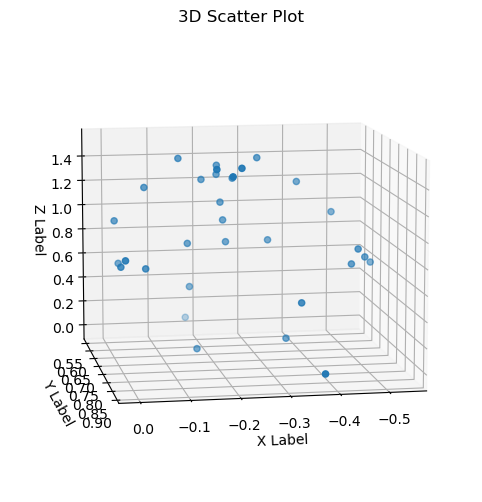

In [59]:
# example of loading

a = load_data_sk(3, reference_df_s)
#print(a)
print(a.shape)

#plot example
plotdata = a[150]
plotdata

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(plotdata[:, 0], plotdata[:, 1], plotdata[:, 2])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')
ax.view_init(elev=10, azim=80)
plt.show()

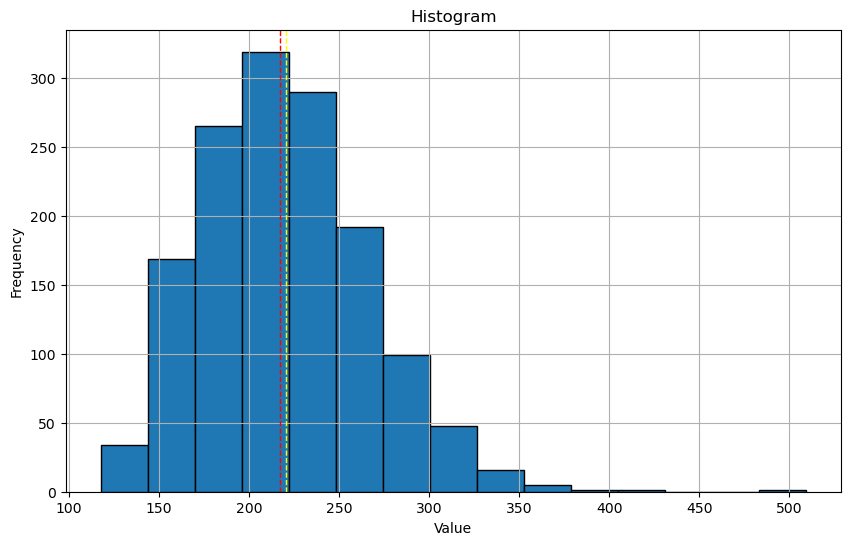

Median of data (red) 217.0
Mean of data (yellow) 220.38888888888889
Standard dev of data 45.652797637152155


In [14]:
# check duration of walking samples
hist = []

for i in range(0,len(reference_df_s)):
    data = load_data_sk(i, reference_df_s)
    hist.append(data.shape[0])
    
# Create a histogram
plt.hist(hist, bins=15, edgecolor='black')

# Add a vertical line for the median
plt.axvline(np.median(hist), color='red', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(hist), color='yellow', linestyle='dashed', linewidth=1)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

# Show the plot
plt.show()
print("Median of data (red)",np.median(hist))
print("Mean of data (yellow)",np.mean(hist))
print("Standard dev of data", np.std(hist))

#### Cropping/padding function
Given the variability in the length of the sample of the walking data we need to crop and pad, we decided to do it around the median value at 217 samples, we need to figure out the best padding, at the moment 'edge' seems to be the most reasonable one since it corresponds to a still human being

In [274]:
def random_crop(data, target_size=217, center_crop=False):
    N = data.shape[0]

    # Return data if correct size
    if N == target_size:
        return data

    # If data is too small, then pad only along the first dimension
    if N < target_size:
        tot_pads = target_size - N
        left_pads = int(np.ceil(tot_pads / 2))
        right_pads = int(np.floor(tot_pads / 2)) # tot_pads - left_pads
        return np.pad(data, ((left_pads, right_pads),(0,0),(0,0)), mode='edge', )

    # Random Crop (always centered if center_crop=True)
    if center_crop:
        from_ = int((N / 2) - (target_size / 2))
        #print('Start of the crop: ', from_)
    else:
        from_ = np.random.randint(0, np.floor(N - target_size))
        #print('Start of the crop: ', from_)
    return data[from_:from_ + target_size]

In [16]:
#pad example
a = load_data_sk(20, reference_df_s)
a_crop = random_crop(a)
print('Original shape ',a.shape, 'Cropped/Padded shape ', a_crop.shape)

Original shape  (204, 32, 3) Cropped/Padded shape  (217, 32, 3)


In [269]:
#crop example
a = load_data_sk(3, reference_df_s)
a_crop = random_crop(a)
print('Original shape ',a.shape, 'Cropped/Padded shape ', a_crop.shape)

/Users/lorenzobarbiero/Documents/GitHub/CNN-Gait-recognition/dataset/subject2/steppage/trial7/Sbj2_steppage_T7_S.csv
(239, 32, 3)
Start of the crop:  9
Original shape  (239, 32, 3) Cropped/Padded shape  (217, 32, 3)


Now normalize data

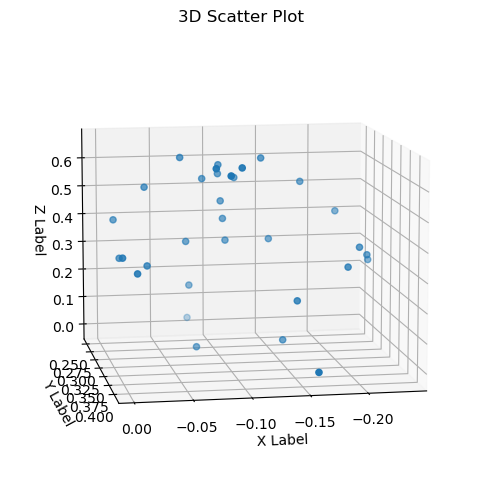

In [18]:
a_norm = normalize_data(a_crop)

plotdata = a_norm[150]
plotdata

#plot example
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(plotdata[:, 0], plotdata[:, 1], plotdata[:, 2])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')
ax.view_init(elev=10, azim=80)
plt.show()

#### Putting everything together, import and preprocess function

In [276]:
def load_prep_sk(index, ref_df, debug = 0):
    data = load_data_sk(index, ref_df)
    #print(data.shape)
    data = normalize_data(data)
    #print(data.shape)
    data = random_crop(data)
    #print(data.shape)
    
    return data.astype(np.float32)

In [280]:
# Generate multiple arrays
#num_arrays = 2
arrays_list = [load_prep_pp(i, train_p) for i in range(len(train_p))]

#print('finished')

# Convert the list of arrays to a TensorFlow tensor
tensor_pp = tf.convert_to_tensor(arrays_list)

# Check the shape of the tensor
print(tensor_pp.shape)  # Output: (10, 217, 32, 3)

(1152, 128, 48)


### Plate specific functions

In [60]:
#load data function for pressure

def load_data_pp(index, ref_df, debug = 0):
        
    #file_name = ref_df.loc[ref_df.index[index],'File Name']   
    #filepath = root_directory + '/dataset/' + ref_df.loc[ref_df['File Name']==file_name,'Path from Root'] + file_name
    
    filepath = fpath(ref_df,index)    
    dfplate = pd.read_csv(filepath, header=None).to_numpy()
    
    if debug == 1:
        print(file_name)
        print(filepath.iloc[0])
        print(data.shape)
    
    return dfplate.squeeze()

(128, 48)


<Axes: >

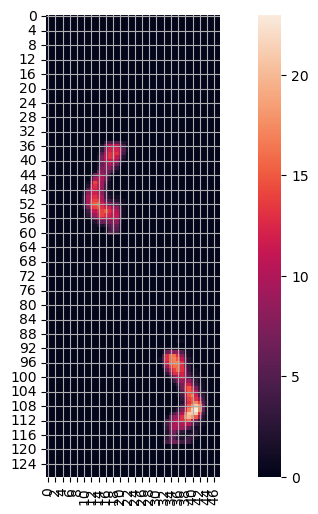

In [61]:
# loading example
b = load_data_pp(12, reference_df_p)
#print(b)
print(b.shape)

#and plot an example
sns.heatmap(b, square= True)

Some good ideas for preprocessing could be:

Normalize the dataset to lose the dependence over the weigth of the participant

<Axes: >

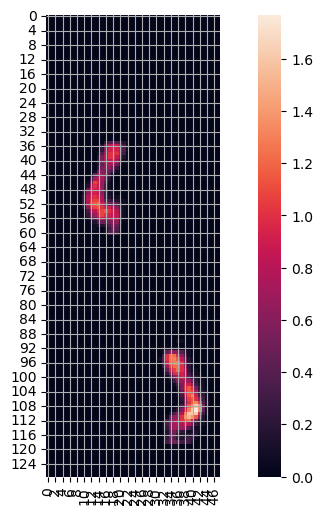

In [21]:
b_norm = normalize_data(b)
#plot
sns.heatmap(b_norm, square= True)

Shift all matrices to be centered wrt the barycenter

In [37]:
def bar (data, printbar=0):
    # the first dimension (128) is along y
    # Compute the weighted average (barycenter) along each dimension
    y_barycenter = np.average(np.arange(data.shape[0]), weights=np.sum(data, axis=1))
    x_barycenter = np.average(np.arange(data.shape[1]), weights=np.sum(data, axis=0))
    
    if printbar == 1:
        print("Barycenter coordinates (x,y) = ",x_barycenter,y_barycenter)

    # Compute the distances between each point and the barycenter
    y_distances = np.arange(data.shape[0]) - y_barycenter
    x_distances = np.arange(data.shape[1]) - x_barycenter

    # Shift the foot pressure matrix to be centered on the barycenter
    shifted_matrix = np.roll(data, int(round(y_distances.mean())), axis=0)
    shifted_matrix = np.roll(shifted_matrix, int(round(x_distances.mean())), axis=1)
    
    return shifted_matrix


 After centering
Barycenter coordinates (x,y) =  27.79927558104437 79.38877150618774

 After centering
Barycenter coordinates (x,y) =  23.79927558104437 63.38877150618773


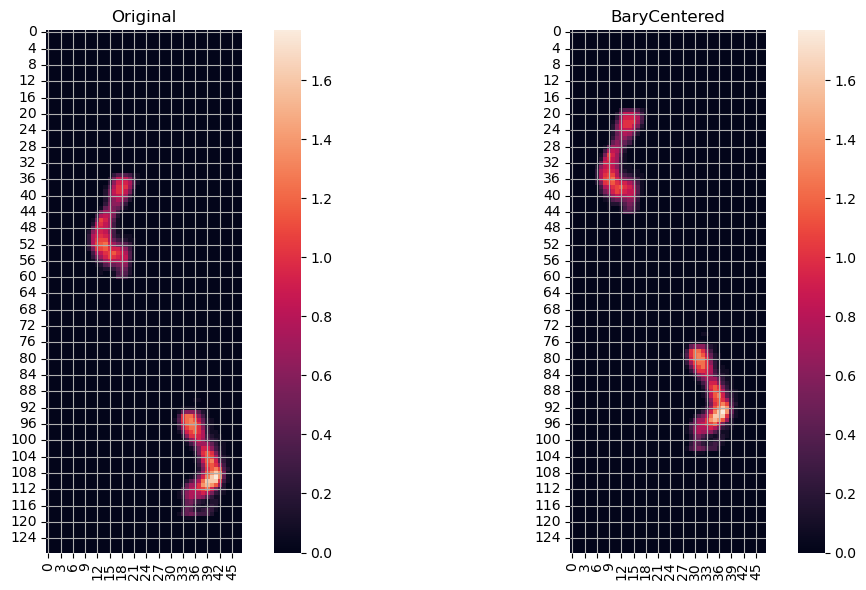

In [41]:
print( "\n","After centering")
shifted_b=bar(b_norm,printbar = 1)

print( "\n","After centering")
#check
shifted_b = bar(shifted_b,printbar = 1)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(b_norm, square= True, ax=axes[0])
axes[0].set_title('Original')

sns.heatmap(shifted_b, square= True,ax=axes[1])
axes[1].set_title('BaryCentered')

plt.tight_layout()
plt.show()

Coordinates are close enough to the expected (24,64)

In [43]:
def load_prep_pp(index, ref_df, debug = 0):
    
    data = load_data_pp(index, ref_df)
    data = normalize_data(data)
    data = bar(data)
    
    return data.astype(np.float32)

In [46]:
#check
lpp = load_data_pp(1, reference_df_p)
lpp.shape

(128, 48)

## Input data pipeline
### Skeleton Data
Work in progress

In [250]:
'''
def create_dataset_sk(ref_df, input_size, center_crop, batch_size, shuffle, cache_file=None):
    print(type(ref_df))
    
    # Extract complete file paths from dataframe
    file_names = [fpath(ref_df,i) for i in range(0,len(ref_df))]
    #labels = [extractlabs(ref_df,i) for i in range(0,len(ref_df))]
    index = [i for i in range(0,len(ref_df))]
    labels = list(ref_df['Label'])

    # Create a Dataset object
    dataset = tf.data.Dataset.from_tensor_slices((file_names, labels))

    py_func = lambda index, label: (tf.numpy_function(load_prep_sk, [index, ref_df],tf.float32), label)
    dataset = dataset.map(py_func, num_parallel_calls=os.cpu_count())
    # Map the load_and_preprocess_data function
    
    # Cache dataset
    if cache_file:
        dataset = dataset.cache(cache_file)

    # Shuffle
    if shuffle:
        dataset = dataset.shuffle(len(file_names))

    # Repeat the dataset indefinitely
    dataset = dataset.repeat()

    # Map the crop function
    py_func = lambda data, label: (tf.ensure_shape(tf.numpy_function(random_crop, [data, input_size, center_crop], tf.float32),
                                                   input_size), label)
    dataset = dataset.map(py_func)

    # Correct input shape for the network
    dataset = dataset.map(lambda data, label: (tf.expand_dims(data, 1), label))

    # Batch
    dataset = dataset.batch(batch_size=batch_size)

    # Prefetch
    dataset = dataset.prefetch(buffer_size=1)

    return dataset

'''

In [251]:
'''
input_size = 9000
batch_size = 32
train_dataset = create_dataset_sk(train_s,
                               input_size=input_size,
                               center_crop=False,
                               batch_size=batch_size,
                               shuffle=True,
                               cache_file='train_cache')

val_dataset = create_dataset_sk(val_s,
                             input_size=input_size,
                             center_crop=True,
                             batch_size=batch_size,
                             shuffle=False,
                             cache_file='val_cache')

train_steps = int(np.ceil(len(train_s)/batch_size))
print(train_steps)
val_steps = int(np.ceil(len(val_s)/batch_size))
print(val_steps)
'''

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
36
9


### Pressure data

## Neural Network
Create tensors

In [292]:
def tensor_creator (ref_df, fnc = None):
    if fnc == 'S':
        print("Loading and converting skeleton data", '\n')
        arrays_list = [load_prep_sk(i, ref_df) for i in range(len(ref_df))]
    if fnc == 'P':
        print("Loading and converting pressure data", '\n')
        arrays_list = [load_prep_pp(i, ref_df) for i in range(len(ref_df))]
    else:
        print("Loading and converting labels", '\n')
        arrays_list = list(ref_df['Label'])
        
        
    tensor_pp = tf.convert_to_tensor(arrays_list)
    print("Shape of resulting tensor ", tensor_pp.shape)

In [286]:
skeleton_tensor = tensor_creator(train_s, 'S')

Loading and converting skeleton data 

Shape of resulting tensor  (1152, 217, 32, 3)


In [287]:
pressure_tensor = tensor_creator(train_p, 'P')

Loading and converting pressure data 

Shape of resulting tensor  (1152, 128, 48)


In [293]:
label_tensor = tensor_creator(train_s)

Loading and converting labels 

Shape of resulting tensor  (1152,)


### Dummy CNN

In [ ]:
CNN_inputs = tf.keras.Input(shape=(None, 128, 48))

x = tf.keras.layers.Conv2D(filters = 32,
                           kernel_size = 3,
                           strides = 1,
                           padding = 'valid',
                           activation = 'relu',
                           name='I_Conv2D')(CNN_inputs)
x = tf.keras.layers.MaxPool2D(pool_size = 2)(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(64, 3, 1, padding='valid', activation = 'relu', name='II_Conv2D')(x)
x = tf.keras.layers.MaxPool2D(2)(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Conv2D(128, 3, 1, padding='valid', activation = 'relu', name='III_Conv2D')(x)
x = tf.keras.layers.MaxPool2D(2)(x)
x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(64, activation='relu', name='I_layer')(x)
x = tf.keras.layers.Dense(32, activation='relu', name='II_layer')(x)
x = tf.keras.layers.Dense(16, activation='relu', name='III_layer')(x)

                                                                                                    # le classi di output sono 6 giusto?

CNN_outputs = tf.keras.layers.Dense(6, activation='softmax', name='Output_layer')(x)                # sto gia' facendo qui il softmax


CNN_classifier_model = keras.Model(inputs=CNN_inputs, outputs=CNN_outputs)

print(CNN_classifier_model.summary(), '\n')

### Dummy RNN

In [ ]:
RRN_inputs = keras.Input(shape=(None, target_size, 32, 3))                                                              # a sequence of length 'none' and at each instant the input vector has length 28

# h(t) = tanh(W_hx * x(t) + W_hh * h(t-1) + bias)
x = tf.keras.layers.GRU(125, return_sequences=True, activation='tanh', name='I_GRU')(RRN_inputs)

x = tf.keras.layers.GRU(125, return_sequences=True, activation='tanh', name='II_GRU')(x)
x = tf.keras.layers.GRU(125, return_sequences=True, activation='tanh', name='III_GRU')(x)
x = tf.keras.layers.GRU(125, return_sequences=False, activation='tanh', name='IV_GRU')(x)

x = tf.keras.layers.Flatten()(x)                                                                       # serve davvero il flatten?

x = tf.keras.layers.Dense(64, activation='relu', name='I_layer')(x)
x = tf.keras.layers.Dense(32, activation='relu', name='II_layer')(x)
x = tf.keras.layers.Dense(16, activation='relu', name='III_layer')(x)

                                                                                                      # le classi di output sono 6 giusto?

RNN_outputs = tf.keras.layers.Dense(6, activation='softmax', name='Output_layer')(x)                  # sto gia' facendo qui il softmax


RNN_classifier_model = keras.Model(inputs=RRN_inputs, outputs=RNN_outputs)

print(RNN_classifier_model.summary(), '\n')